This is a demo of how a simple Gaussian Process works.



$$K = \lambda^{-1} \exp\left(\frac{-r^2}{2l^2}\right) + \sigma_n^2 I$$



In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [11]:
%matplotlib inline
%autoreload 2 

In [12]:
from matplotlib import rc
rc("font", family="serif")

In [224]:
from ipywidgets import interact
import ipywidgets as widgets

In [218]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)
import george
import pandas as pd
from george.kernels import (ExpSquaredKernel, 
                            WhiteKernel, 
                            KappaKappaExpSquaredKernel)

In [47]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as dplot
import matplotlib.gridspec as gridspec

# We let our data to be drawn from a `sine` function but with some Gaussian noise

In [394]:
data_point_num = 20
random_coords = np.sort(np.random.rand(data_point_num))

yerr_amp = 0.15
inv_phase = 5
y = np.sin(random_coords * inv_phase)
yerr = yerr_amp * np.random.rand(data_point_num) 
y += yerr 

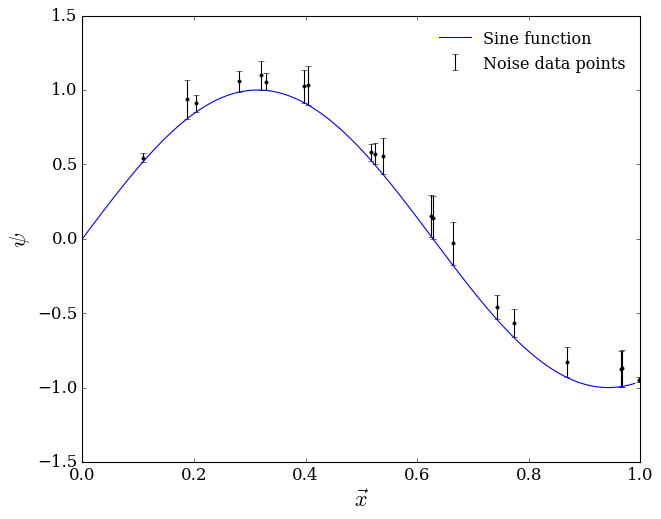

In [378]:
plt.plot(random_coords, y, 'k.')
plt.errorbar(random_coords, y, yerr, marker='.', color='k', 
             ecolor='k', fmt=None, label='Noise data points')
plt.plot(np.arange(0., 1., 1e-2), 
         np.sin(np.arange(0., 1., 1e-2) * inv_phase), label='Sine function')
_ = plt.ylim(-1.5, 1.5)
plt.ylabel(r'$\psi$')
plt.xlabel(r'$\vec{x}$')
plt.legend(loc='upper right', frameon=False, numpoints=1)

# Gaussian process demo with 1D input data

In [331]:
file_path = "/Users/karenyng/MyThesis/Figures/chapter4/"

In [401]:
def plot_GP(l_sq, inv_lambda, save=False):
    gaussianProcess = george.GP(
        inv_lambda * ExpSquaredKernel(l_sq, ndim=1))
    cov_kernel = gaussianProcess.get_matrix(random_coords) 
    fig = plt.figure(figsize=(21, 7))
    gs = gridspec.GridSpec(1, 2) 
    gs.update(hspace=0.2, wspace=0.2)

    # compute the model
    gaussianProcess.compute(random_coords, yerr)
    predictions = gaussianProcess.sample_conditional(
        y, random_coords, size=100)

    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(random_coords, predictions[0], 'gray',
             label='drawn GP realizations')
    
    for prediction in predictions[1:]:
        ax1.plot(random_coords, prediction, 'gray', alpha=0.2,)
    ax1.plot(random_coords, y, 'k.')
    ax1.plot(random_coords, np.mean(predictions, axis=0), 'red',
             label='mean GP realization')
    ax1.errorbar(random_coords, y, yerr, marker='.', color='k', 
                 ecolor='k', fmt=None, label='Noisy data')
    ax1.plot(np.arange(0., 1., 1e-2), 
         np.sin(np.arange(0., 1., 1e-2) * inv_phase), 
             label='Sine function', linestyle='--')
    ax1.set_xlabel(r'$\vec{x}$')
    ax1.set_ylabel(r'$\psi$')
    ax1.set_ylim(-1.5, 1.5)
    ax1.legend(loc='upper right', numpoints=1, frameon=False)
    
    ax1.set_title(
        'GP data realizations with {} data points'.format(data_point_num))

    ax2 = plt.subplot(gs[0, 1])
    im = ax2.imshow(cov_kernel, cmap=plt.cm.summer, vmin=0, vmax=1.0)
    # plt.colorbar(im, cax = ax2)
    ax2.set_xlabel(r'sorted $\vec{x}$ entry number')
    ax2.set_ylabel(r'sorted $\vec{x}$ entry number')
    ax2.set_title(r'Exponential squared kernel matrix with $l^2$ = {0}'.format(l_sq))
    

    fig.subplots_adjust(right=0.8)
    
    cbar_ax = fig.add_axes([0.8, 0.15, 0.025, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    if save:
        filename = 'expSq_kernel_demo_lsq_{0}.png'.format(
                        str(l_sq).replace('.', 'pt'))
        print (filename + " is saved.")
        fig.savefig(file_path + filename, bbox_inches='tight')

<function __main__.plot_GP>

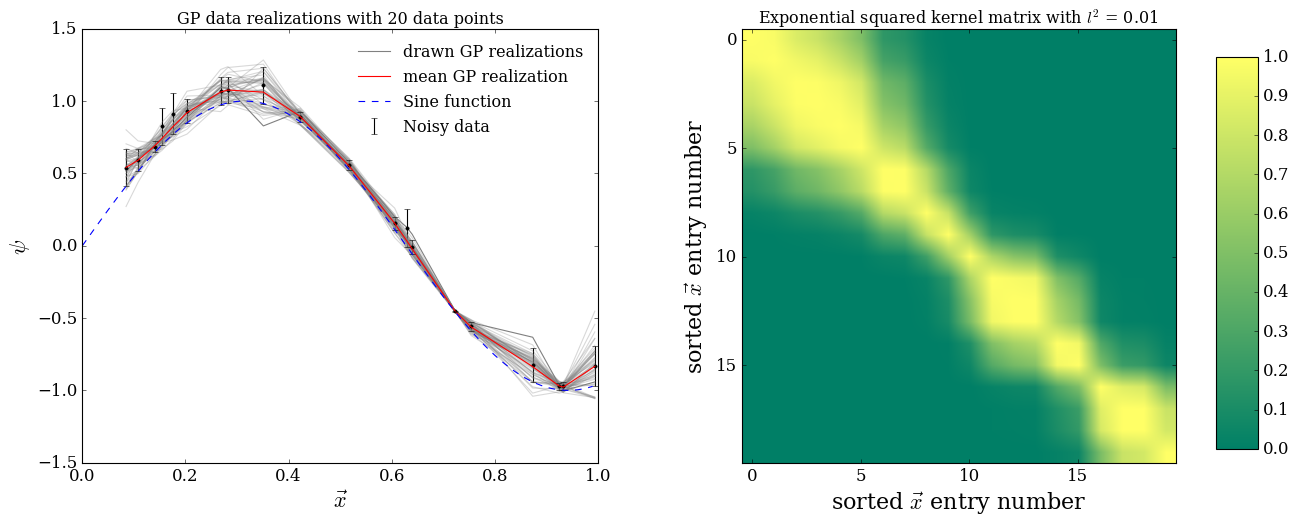

In [395]:
interact(plot_GP, l_sq=widgets.FloatSlider(
        min=0.01, max=1.6, step=0.1, value=0.01), 
         inv_lambda=widgets.FloatSlider(
        min=0.01, max=1.6, step=0.1, value=1.), save=False)

We can see that the GP can only fit the sine function well when the smoothing length $l^2$ is not too big.

expSq_kernel_demo_lsq_0pt1.png is saved.
expSq_kernel_demo_lsq_1pt1.png is saved.
expSq_kernel_demo_lsq_0pt01.png is saved.


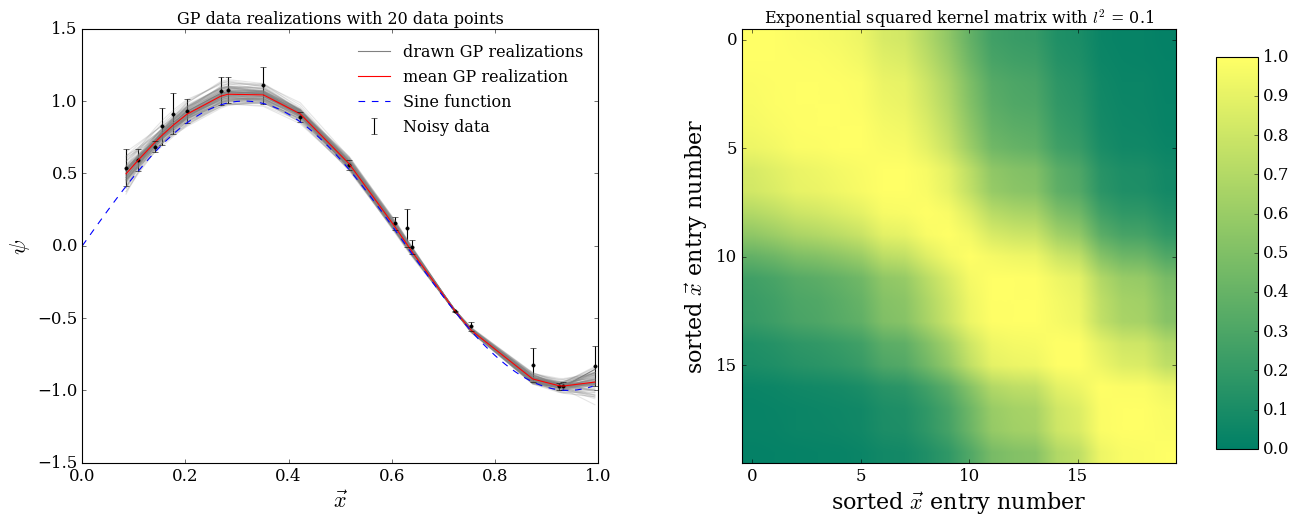

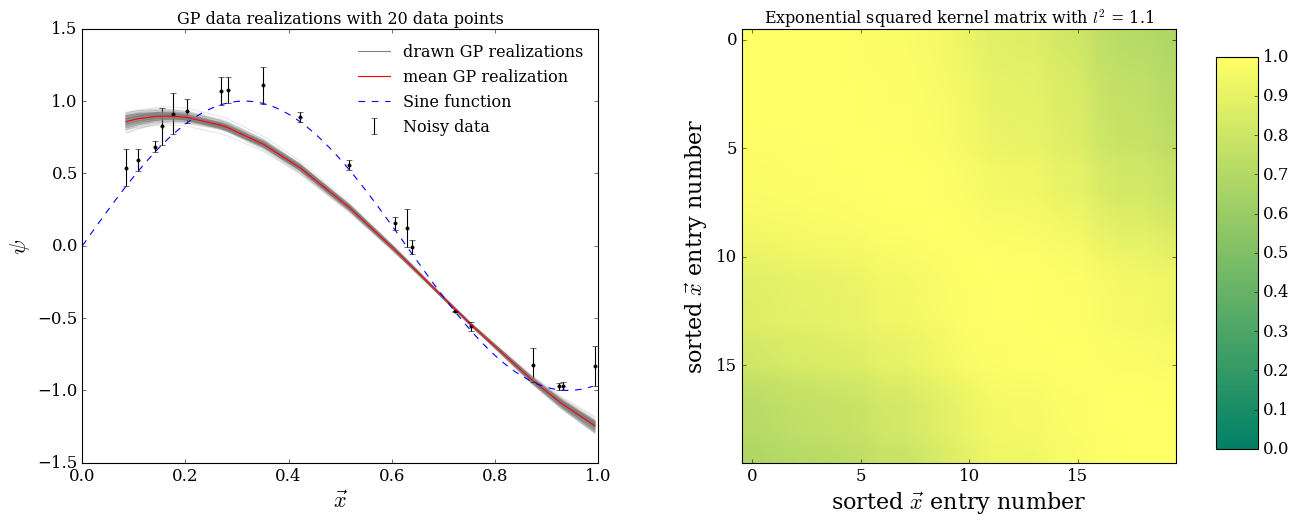

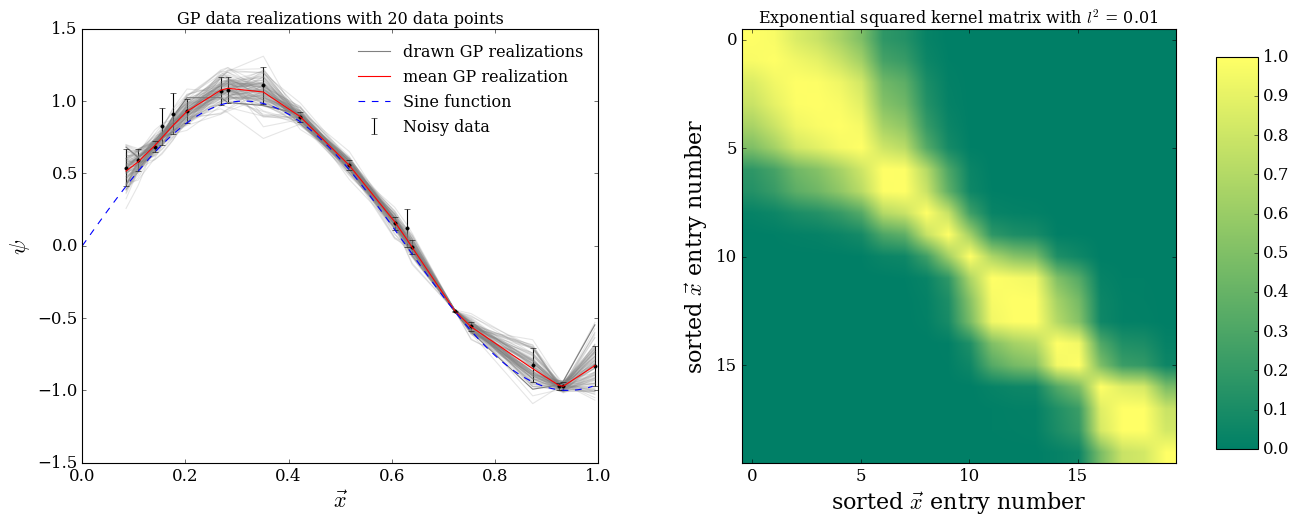

In [402]:
plot_GP(l_sq=0.1, inv_lambda=1.0, save=True)
plot_GP(l_sq=1.1, inv_lambda=1.0, save=True)
plot_GP(l_sq=.01, inv_lambda=1.0, save=True)

# example with 1D inputs

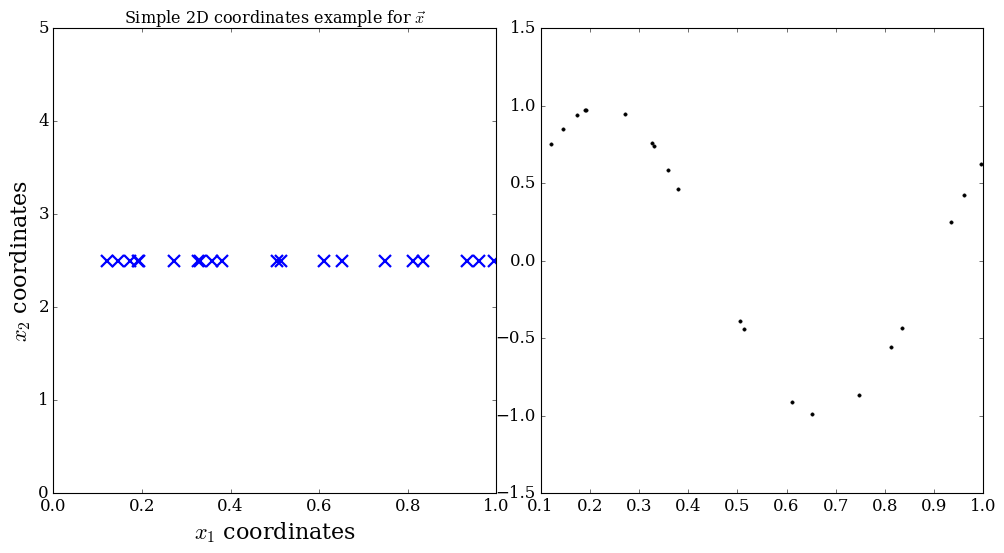

In [115]:
plt.figure(figsize=(15, 7.5))
gs = gridspec.GridSpec(1, 2) 
gs.update(hspace=0.2, wspace=0.1)
 #cmap=plt.cm.RdYlBu)
ax1 = plt.subplot(gs[0, 0])
ax1.set_xlabel('$x_1$ coordinates')
ax1.set_ylabel('$x_2$ coordinates')
ax1.set_title(r'Simple 2D coordinates example for $\vec{x}$')
_ = ax1.plot(two_d_line_coords[0], two_d_line_coords[1], 'x', ms=10, mew=2)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 5)

ax2 = plt.subplot(gs[0, 1])
ax2.plot(sorted(two_d_line_coords[0]), sin_func, 'k.') 
_ = ax2.set_ylim(-1.5, 1.5)
# plt.colorbar()

# 1D distance matrix

# simple example 1 with `ExpSquaredKernel`

In [177]:
gaussianProcess = george.GP(inv_lambda * ExpSquaredKernel(l_sq, ndim=2))
cov_kernel = gaussianProcess.get_matrix() 

ValueError: Dimension mismatch

In [ ]:
plt.

# ExpSquaredKernel visualization

In [ ]:
figside = 15 
fig.set_figheight(figside)
fig.set_figwidth(figside)

ax = fig.add_subplot(131, aspect='equal')
ax.contourf(xg, yg, M32[entry])
ax.set_title("Matern32 kernel")

ax = fig.add_subplot(132, aspect='equal')
ax.contourf(xg, yg, M52[entry])
ax.set_title("Matern52 kernel")
#ax.colorbar()

ax = fig.add_subplot(133, aspect='equal')
im = ax.contourf(xg, yg, ExpSq[entry])
ax.set_title("ExpSq kernel")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.40, 0.025, 0.2])
fig.colorbar(im, cax=cbar_ax)



# We make a composite kernel 

In [6]:
kernels = [KappaKappaExpSquaredKernel, WhiteKernel]

In [8]:
data = fit.generate_2D_data(truth, data_pt_nos, kernels, rng=rng)

NameError: name 'truth' is not defined